In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
def softmax(x):
  exp_element=np.exp(x-x.max())
  return exp_element/np.sum(exp_element, keepdims=True, axis=0)

def d_softmax(x):
  exp_element=np.exp(x-x.max())
  return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

def relu(x):
  return np.maximum(0,x)
  
def d_relu(da,z):
  dz = np.array(da, copy=True)
  dz[z<=0] = 0
  dz[z>0] = 1
  return dz

def sigmoid(x):
  return 1/(np.exp(-x)+1)

def d_sigmoid(x):
  return (np.exp(-x))/((np.exp(-x)+1)**2)

def one_hot(row_vector, no_classes):
  one_hot_vector = np.eye(no_classes)[row_vector.reshape(-1)]
  return one_hot_vector.T

In [15]:
class NeuralNet:

  def __init__(self, layers):
    self.num_layers = len(layers)
    num_layers = self.num_layers
    self.W = []
    self.B = []
    for i in range(1, self.num_layers):
      self.W.append(np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1]))
      self.B.append(np.zeros((layers[i],1)))

  def forward(self, X):
    self.Z = []
    self.A = []
    self.A.append(X)   
    for i in range(1, self.num_layers-1):
      self.Z.append(np.dot(self.W[i-1], self.A[i-1]) + self.B[i-1])
      self.A.append(relu(self.Z[i-1]))
    self.Z.append(np.dot(self.W[self.num_layers-2], self.A[self.num_layers-2]) + self.B[self.num_layers-2])
    self.A.append(softmax(self.Z[self.num_layers-2]))
    return self.Z, self.A

  def cost(self, Y):
    self.L = -np.sum(Y*np.log(self.A[self.num_layers-1] + 10**-7), keepdims=True, axis=0)
    self.J = np.sum(self.L, keepdims=True, axis=1)/60000
    return self.L, self.J

  def backward(self, Y):
    self.dA = []
    self.dB = []
    self.dW = []
    self.dZ = []
    self.dZ.append(self.A[self.num_layers-1] - Y)
    self.dW.append(np.dot(self.dZ[0], self.A[self.num_layers-2].T)/60000)
    self.dB.append(np.sum(self.dZ[0], axis=1, keepdims=True)/60000)
    self.dA.append(np.dot(self.W[self.num_layers-2].T, self.dZ[0]))
    for i in range(1,self.num_layers-1):
      self.dZ.append(np.multiply(self.dA[i-1], d_relu(self.dA[i-1], self.Z[self.num_layers-i-2])))
      self.dW.append(np.dot(self.dZ[i], self.A[self.num_layers-i-2].T)/60000)
      self.dB.append(np.sum(self.dZ[i], axis=1, keepdims=True)/60000)
      self.dA.append(np.dot(self.W[self.num_layers-i-2].T, self.dZ[i]))
    return self.dA, self.dB, self.dW, self.dZ

  def gradient(self, alpha):
    for i in range(0,self.num_layers-1):
      self.W[i] = self.W[i] - (alpha)*(self.dW[self.num_layers-i-2])
      self.B[i] = self.B[i] - (alpha)*(self.dB[self.num_layers-i-2])
    return self.W, self.B

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
x_train = x_train.astype(float)
x_test = x_test.astype(float)
x_train /= 255
x_test /= 255
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)
assert x_train.shape == (784, 60000)
assert x_test.shape == (784, 10000)
assert y_train.shape == (10, 60000)
assert y_test.shape == (10, 10000)

In [ ]:
net = NeuralNet([784, 512, 128, 32, 10])
print(np.shape(net.B[3]))
z, a = net.forward(x_train)
print(np.shape(a[0]))
da, db, dw, dz = net.backward(y_train)
print(np.shape(dw[3]))
w, b = net.gradient(0.01)
print(np.shape(w[0]))

In [16]:
Net = NeuralNet([784,512,128,32,10])

In [17]:
cost_func = []
for j in range(0,100):
  Net.forward(x_train)
  L, J = Net.cost(y_train)
  cost_func.append(np.squeeze(J))
  if j%5 ==0:
      print(f'{j} : {J}')
  Net.backward(y_train)
  Net.gradient(0.05)

0 : [[2.28635091]]
5 : [[2.0949873]]
10 : [[1.88842013]]
15 : [[1.65889263]]
20 : [[1.43704615]]
25 : [[1.24383078]]
30 : [[1.08583389]]
35 : [[0.96095355]]
40 : [[0.86329773]]
45 : [[0.78638647]]
50 : [[0.72503204]]
55 : [[0.67522619]]
60 : [[0.63404403]]
65 : [[0.5993952]]
70 : [[0.56980419]]
75 : [[0.54420199]]
80 : [[0.52181018]]
85 : [[0.50203784]]
90 : [[0.48443947]]
95 : [[0.46869038]]


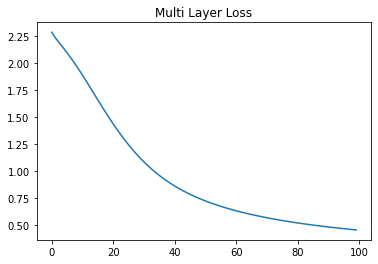

In [18]:
plt.plot(cost_func)
plt.title("Multi Layer Loss")
plt.show()